## Chapter 3's Table of Contents

* [3.1 Feature Engineering](#3_1)
* [3.2 Modelling](#3_2)
* [3.3 Hyperparameter Tuning](#3_3)
    * [3.3.1 Logistic Regression ](#3_3_1)
    * [3.3.2 Decision Tree Classifier](#3_3_2)
    * [3.3.3 Bagging x Decision Tree Classifier](#3_3_3)
    * [3.3.4 Bagging x LR Classifier](#3_3_4)
    * [3.3.5 ADABoost](#3_3_5)
    * [3.3.6 SVM Classifier](#3_3_6)
* [3.4 Model Evaluation](#3_4)
* [3.5 Insights](#3_5)
* [3.6 Conclusion](#3_6)

In [1]:
import pandas as pd
import numpy as np

# for modelling
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, plot_roc_curve, plot_confusion_matrix
import matplotlib.pyplot as plt

# for Model Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')
from time import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, roc_auc_score, plot_roc_curve, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from time import time
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('../project_4b/data/protest_cleaned.csv')

## 3.1 Feature Engineering <a class="anchor" id="3_1"></a>

In [3]:
df.head()

,country,year,region,protestnumber,protesterviolence,participantnumber,protesteridentity,notes,startdate,enddate,protestdays,aggressive_response,labor_wage_dispute,land_farm_issue,political_behavior_process,police_brutality,price_increase_tax_policy,removal_of_politician,social_restrictions,notes_lemmatized,abortion,activists,anti_democracy,democracy,opposition,educators,environmental,human_rights,immigrants,ethnic_discrimination,lgbtq,local_residents,peasants_villagers,refugees,religion,separatist_independence,students,veterans,men,women,agriculture,white_collar,blue_collar,unemployed,youths,unspecified_protesters
0,Canada,1990,North America,1,0,1000,protester,canada s railway passenger system was finally ...,15/1/1990,15/1/1990,1,0,1,0,1,0,0,0,0,"['canada', 'railway', 'passenger', 'system', '...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Canada,1990,North America,2,0,1000,protester,protestors were only identified as young peopl...,25/6/1990,25/6/1990,1,0,0,0,1,0,0,0,0,"['protestors', 'identified', 'young', 'people'...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,Canada,1990,North America,3,0,500,separatist parti quebecois,"the queen, after calling on canadians to remai...",1/7/1990,1/7/1990,1,0,0,0,1,0,0,0,0,"['queen', 'calling', 'canadian', 'remain', 'un...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Canada,1990,North America,4,1,100,mohawk indian,canada s federal government has agreed to acqu...,12/7/1990,6/9/1990,57,0,0,1,0,0,0,0,0,"['canada', 'federal', 'government', 'agreed', ...",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Canada,1990,North America,5,1,950,local resident,protests were directed against the state due t...,14/8/1990,15/8/1990,2,1,0,0,1,0,0,0,0,"['protest', 'directed', 'state', 'due', 'refus...",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
df = pd.get_dummies(df, columns = ['country'], drop_first = True)

In [6]:
features = df.drop(columns = ['region', 'protesteridentity', 'notes','startdate', 'enddate', 'notes_lemmatized', 'aggressive_response'])

## 3.2 Modelling <a class="anchor" id="3_2"></a>

In [47]:
# First, it is important we establish a baseline

baseline = df['aggressive_response'].mean()

print ('Our Baseline is ' + str(baseline))

Our Baseline is 0.4059977688824726


<AxesSubplot:xlabel='aggressive_response', ylabel='count'>

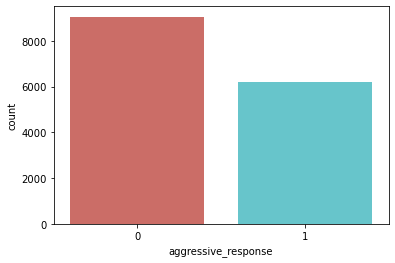

In [49]:
import seaborn as sb
sb.countplot(x='aggressive_response', data=df, palette='hls')

In [7]:
X = features
y = df['aggressive_response']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42,
                                                    stratify=y)

In [8]:
ss= StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [9]:
# Instantiate logistic regression model
lr = LogisticRegression(solver = 'lbfgs', max_iter = 5000)

# Scale
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# Fit model to training data
lr.fit(X_train, y_train)

# Evaluate model on training data
print('Accuracy score for Train data set:',lr.score(X_train, y_train))

# Evaluate model on testing data
print('Accuracy score for Test data set:', lr.score(X_test, y_test))

preds = lr.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()


print('Specificity:', round(tn / (tn + fp),4))
print('Sensitivity:', round(tp / (tp + fn),4))

Accuracy score for Train data set: 0.7937702336162394
Accuracy score for Test data set: 0.7981627296587926
Specificity: 0.901
Sensitivity: 0.6477


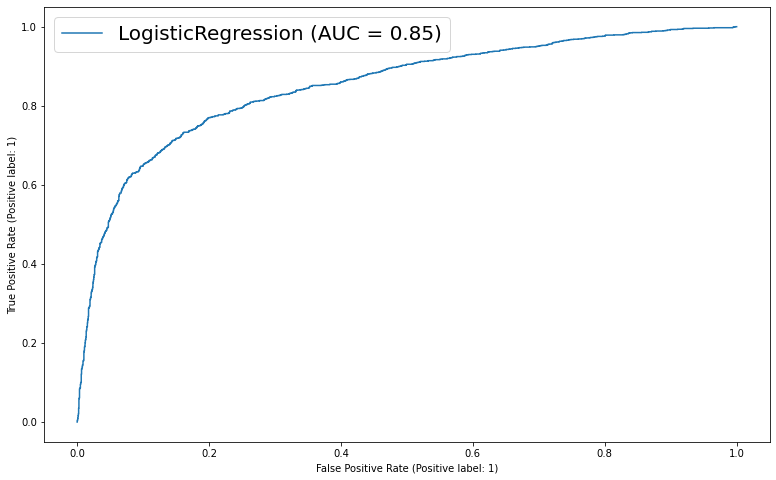

In [52]:
fig, ax = plt.subplots(figsize=(13, 8))
plot_roc_curve(lr, X_test, y_test, ax = ax)
plt.legend(prop={"size":20});
plt.savefig("../project_4b/charts/logreg_auc.jpg", bbox_inches = 'tight')

## 3.3 Hyperparameter Tuning <a class="anchor" id="3_3"></a>

### 3.3.1 Logistic Regression <a class="anchor" id="3_3_1"></a>

In [11]:
lr_hyper = Pipeline([
    ('ss', StandardScaler()),
    ('lr_hyper', LogisticRegression())
])

pipe_params = {
    'lr_hyper__C': [100, 10, 1.0, 0.1, 0.01],
    'lr_hyper__intercept_scaling': [1, 1.5, 2],
    'lr_hyper__max_iter': [100, 500, 1000]
}

gs_lr_hyper = GridSearchCV(lr_hyper, # what object are we optimizing?
                  param_grid=pipe_params, # what parameters values are we searching?
                  cv=5) # 5-fold cross-validation.

t0 = time()
gs_lr_hyper.fit(X_train, y_train)
lr_hyper_test_time = time() - t0
print('Best LR Parameters:', gs_lr_hyper.best_estimator_)
print('Fit time:  %0.3fs' % lr_hyper_test_time);

Best LR Parameters: Pipeline(steps=[('ss', StandardScaler()),
                ('lr_hyper', LogisticRegression(C=0.01))])
Fit time:  45.560s


In [12]:
knn = Pipeline([
    ('ss', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

pipe_params = {
    'knn__n_neighbors': [10,15],
    'knn__p': [1,2]
}

gs_knn = GridSearchCV(knn, # what object are we optimizing?
                  param_grid=pipe_params, # what parameters values are we searching?
                  cv=5) # 5-fold cross-validation.

t0 = time()
gs_knn.fit(X_train, y_train)
knn_test_time = time() - t0
print('Best KNN Parameters:', gs_knn.best_estimator_)
print('Fit time:  %0.3fs' % knn_test_time);

Best KNN Parameters: Pipeline(steps=[('ss', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=10, p=1))])
Fit time:  65.433s


### 3.3.2 Decision Tree Classifier <a class="anchor" id="3_3_2"></a>

In [13]:
cart = Pipeline([
    ('ss', StandardScaler()),
    ('cart', DecisionTreeClassifier())
])

pipe_params = {
    'cart__min_samples_split': [100 ,200, 300],
    'cart__ccp_alpha': [0, 0.001]
}

gs_cart = GridSearchCV(cart, # what object are we optimizing?
                  param_grid=pipe_params, # what parameters values are we searching?
                  cv=5) # 5-fold cross-validation.

t0 = time()
gs_cart.fit(X_train, y_train)
cart_test_time = time() - t0
print('Best CART Parameters:', gs_cart.best_estimator_)
print('Fit time:  %0.3fs' % cart_test_time);

Best CART Parameters: Pipeline(steps=[('ss', StandardScaler()),
                ('cart',
                 DecisionTreeClassifier(ccp_alpha=0.001,
                                        min_samples_split=100))])
Fit time:  12.217s


### 3.3.3 Bagging x Decision Tree Classifier <a class="anchor" id="3_3_3"></a>

In [29]:
# Setting pipeline for two stages
bag_dt = Pipeline([
    ('ss', StandardScaler()),
    ('bag_dt', BaggingClassifier(DecisionTreeClassifier()))
])

pipe_params = {
    'bag_dt__base_estimator' : [None, 1, 2, 3, 4, 5],
    'bag_dt__max_features': [1.0, 2.0, 3.0, 4.0],
    'bag_dt__max_samples' : [0.05, 0.1, 0.2, 0.5]
}

gs_bag_dt = GridSearchCV(bag_dt, # what object are we optimizing?
                  param_grid=pipe_params, # what parameters values are we searching?
                  cv=5) # 5-fold cross-validation.
t0 = time()
gs_bag_dt.fit(X_train, y_train)
bag_test_time = time() - t0
print('Best BAG x DT Parameters:', gs_bag_dt.best_estimator_)
print('Fit time:  %0.3fs' % bag_test_time);

Best BAG Parameters: Pipeline(steps=[('ss', StandardScaler()),
                ('bag', BaggingClassifier(max_samples=0.2))])
Fit time:  43.305s


### 3.3.4 Bagging x LR Classifier <a class="anchor" id="3_3_4"></a>

In [43]:
# Setting pipeline for two stages
bag_lr = Pipeline([
    ('ss', StandardScaler()),
    ('bag_lr', BaggingClassifier(LogisticRegression()))
])

pipe_params = {
    'bag_lr__base_estimator' : [None, 1, 2, 3, 4, 5],
    'bag_lr__max_features': [1.0, 2.0, 3.0, 4.0],
    'bag_lr__max_samples' : [0.05, 0.1, 0.2, 0.5]
}

gs_bag_lr = GridSearchCV(bag_lr, # what object are we optimizing?
                  param_grid=pipe_params, # what parameters values are we searching?
                  cv=5) # 5-fold cross-validation.
t0 = time()
gs_bag_lr.fit(X_train, y_train)
bag_lr_test_time = time() - t0
print('Best BAG x LR Parameters:', gs_bag_lr.best_estimator_)
print('Fit time:  %0.3fs' % bag_lr_test_time);

Best BAG x LR Parameters: Pipeline(steps=[('ss', StandardScaler()),
                ('bag_lr', BaggingClassifier(max_samples=0.5))])
Fit time:  42.739s


### 3.3.5 ADABoost <a class="anchor" id="3_3_5"></a>

In [30]:
# Setting pipeline for two stages
ada = Pipeline([
    ('ss', StandardScaler()),
    ('ada', AdaBoostClassifier())])

pipe_params = {
    'ada__n_estimators': [50,100],
    'ada__learning_rate': [0.9, 1]
}

gs_ada = GridSearchCV(ada, # what object are we optimizing?
                  param_grid=pipe_params, # what parameters values are we searching?
                  cv=5) # 5-fold cross-validation.
t0 = time()
gs_ada.fit(X_train, y_train)
ada_test_time = time() - t0
print('Best ADABoost Parameters:', gs_ada.best_estimator_)
print('Fit time:  %0.3fs' % ada_test_time);

Best ADABoost Parameters: Pipeline(steps=[('ss', StandardScaler()),
                ('ada',
                 AdaBoostClassifier(learning_rate=0.9, n_estimators=100))])
Fit time:  62.535s


### 3.3.6 SVM Classifier <a class="anchor" id="3_3_6"></a>

In [16]:
svc = Pipeline([
    ('ss', StandardScaler()),
    ('svc', SVC())
])

pipe_params = {
    'svc__kernel': ['rbf'],
    'svc__gamma': ['scale'],
    'svc__C': [0.1, 1.0, 10.0],
    'svc__max_iter': [100, 500, 1000]
}

gs_svc = GridSearchCV(svc, # what object are we optimizing?
                  param_grid=pipe_params, # what parameters values are we searching?
                  cv=5) # 5-fold cross-validation.

t0 = time()
gs_svc.fit(X_train, y_train)
svc_test_time = time() - t0
print('Best SVC Parameters:', gs_svc.best_estimator_)
print('Fit time:  %0.3fs' % svc_test_time);

Best SVC Parameters: Pipeline(steps=[('ss', StandardScaler()), ('svc', SVC(max_iter=1000))])
Fit time:  120.424s


## 3.4 Model Evaluation <a class="anchor" id="3_4"></a>

In [44]:
# Optimise LR and evaluate Model
gs_lr_hyper.fit(X_train, y_train)
print(" Optimised LR ".center(42, "="))
print('Accuracy score for Train data set:', round(gs_lr_hyper.score(X_train, y_train),4))
print('Accuracy score for Test data set:', round(gs_lr_hyper.score(X_test, y_test),4))
preds = gs_lr_hyper.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
print('Specificity:', round(tn / (tn + fp),4))
print('Sensitivity:', round(tp / (tp + fn),4))
print('Specificity-Sensitivity Balance:', round((1-(tn / (tn + fp))+(tp / (tp + fn))),4))
print(f'Fit Time:', round((lr_hyper_test_time),4))


# Optimise KNN and evaluate Model
gs_knn.fit(X_train, y_train)
print(" Optimised KNN ".center(42, "="))
print('Accuracy score for Train data set:', round(gs_knn.score(X_train, y_train),4))
print('Accuracy score for Test data set:', round(gs_knn.score(X_test, y_test),4))
preds = gs_knn.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
print('Specificity:', round(tn / (tn + fp),4))
print('Sensitivity:', round(tp / (tp + fn),4))
print('Specificity-Sensitivity Balance:', round((1-(tn / (tn + fp))+(tp / (tp + fn))),4))
print(f'Fit Time:', round((knn_test_time),4))


# Optimise DecisionTree and evaluate Model
gs_cart.fit(X_train, y_train)
print(" Optimised DecisionTree ".center(42, "="))
print('Accuracy score for Train data set:', round(gs_cart.score(X_train, y_train),4))
print('Accuracy score for Test data set:', round(gs_cart.score(X_test, y_test),4))
preds = gs_cart.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
print('Specificity:', round(tn / (tn + fp),4))
print('Sensitivity:', round(tp / (tp + fn),4))
print('Specificity-Sensitivity Balance:', round((1-(tn / (tn + fp))+(tp / (tp + fn))),4))
print(f'Fit Time:', round((cart_test_time),4))


# Optimise Bagging-DecisionTree and evaluate Model
gs_bag_dt.fit(X_train, y_train)
print(" Optimised Bagging X DT ".center(42, "="))
print('Accuracy score for Train data set:', round(gs_bag_dt.score(X_train, y_train),4))
print('Accuracy score for Test data set:', round(gs_bag_dt.score(X_test, y_test),4))
preds = gs_bag_dt.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
print('Specificity:', round(tn / (tn + fp),4))
print('Sensitivity:', round(tp / (tp + fn),4))
print('Specificity-Sensitivity Balance:', round((1-(tn / (tn + fp))+(tp / (tp + fn))),4))
print(f'Fit Time:', round((bag_test_time),4))


# Optimise Bagging-LogisticRegression and evaluate Model
gs_bag_lr.fit(X_train, y_train)
print(" Optimised Bagging LR ".center(42, "="))
print('Accuracy score for Train data set:', round(gs_bag_lr.score(X_train, y_train),4))
print('Accuracy score for Test data set:', round(gs_bag_lr.score(X_test, y_test),4))
preds = gs_bag_lr.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
print('Specificity:', round(tn / (tn + fp),4))
print('Sensitivity:', round(tp / (tp + fn),4))
print('Specificity-Sensitivity Balance:', round((1-(tn / (tn + fp))+(tp / (tp + fn))),4))
print(f'Fit Time:', round((bag_lr_test_time),4))


# Optimise ADABoost and evaluate Model
gs_ada.fit(X_train, y_train)
print(" Optimised ADABoost ".center(42, "="))
print('Accuracy score for Train data set:', round(gs_ada.score(X_train, y_train),4))
print('Accuracy score for Test data set:', round(gs_ada.score(X_test, y_test),4))
preds = gs_ada.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
print('Specificity:', round(tn / (tn + fp),4))
print('Sensitivity:', round(tp / (tp + fn),4))
print('Specificity-Sensitivity Balance:', round((1-(tn / (tn + fp))+(tp / (tp + fn))),4))
print(f'Fit Time:', round((ada_test_time),4))


# Optimise SVM and evaluate Model
gs_svc.fit(X_train, y_train)
print(" Optimised SVM ".center(42, "="))
print('Accuracy score for Train data set:', round(gs_svc.score(X_train, y_train),4))
print('Accuracy score for Test data set:', round(gs_svc.score(X_test, y_test),4))
preds = gs_svc.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
print('Specificity:', round(tn / (tn + fp),4))
print('Sensitivity:', round(tp / (tp + fn),4))
print('Specificity-Sensitivity Balance:', round((1+(tn / (tn + fp))-(tp / (tp + fn))),4))
print(f'Fit Time:', round((svc_test_time),4))

============== Optimised LR ==============
Accuracy score for Train data set: 0.7935
Accuracy score for Test data set: 0.7969
Specificity: 0.9037
Sensitivity: 0.6406
Specificity-Sensitivity Balance: 0.7369
Fit Time: 45.5601
============= Optimised KNN ==============
Accuracy score for Train data set: 0.7854
Accuracy score for Test data set: 0.7528
Specificity: 0.8816
Sensitivity: 0.5643
Specificity-Sensitivity Balance: 0.6827
Fit Time: 65.4331
========= Optimised DecisionTree =========
Accuracy score for Train data set: 0.782
Accuracy score for Test data set: 0.79
Specificity: 0.935
Sensitivity: 0.5779
Specificity-Sensitivity Balance: 0.6429
Fit Time: 12.2166
========= Optimised Bagging X DT =========
Accuracy score for Train data set: 0.9165
Accuracy score for Test data set: 0.8013
Specificity: 0.8966
Sensitivity: 0.6619
Specificity-Sensitivity Balance: 0.7653
Fit Time: 43.3052
========== Optimised Bagging LR ==========
Accuracy score for Train data set: 0.9058
Accuracy score for Test

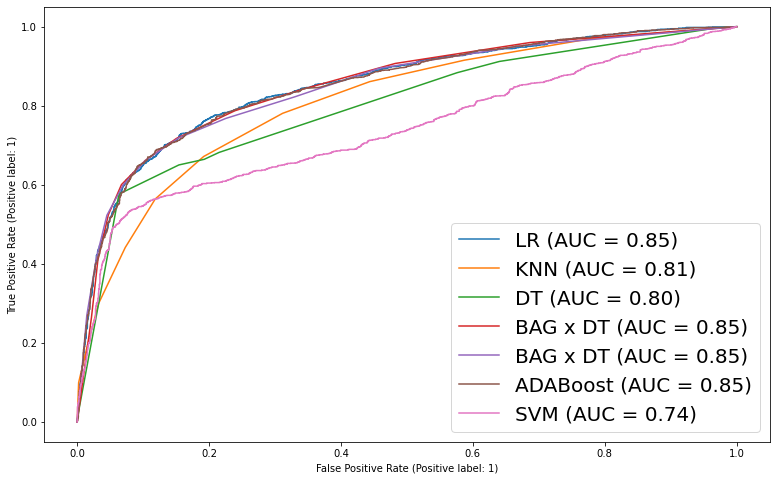

In [53]:
fig, ax = plt.subplots(figsize=(13, 8))
lr_hyper_disp = plot_roc_curve(gs_lr_hyper, X_test, y_test, name = 'LR', ax = ax)
knn_disp = plot_roc_curve(gs_knn, X_test, y_test, name = 'KNN', ax = lr_hyper_disp.ax_)
cart_disp = plot_roc_curve(gs_cart, X_test, y_test, name = 'DT', ax = lr_hyper_disp.ax_)
bag_disp = plot_roc_curve(gs_bag_dt, X_test, y_test, name = 'BAG x DT', ax = lr_hyper_disp.ax_)
bag_lr_disp = plot_roc_curve(gs_bag_lr, X_test, y_test, name = 'BAG x DT', ax = lr_hyper_disp.ax_)
ada_disp = plot_roc_curve(gs_ada, X_test, y_test, name = 'ADABoost', ax = lr_hyper_disp.ax_)
svm_disp = plot_roc_curve(gs_svc, X_test, y_test, name = 'SVM', ax = lr_hyper_disp.ax_)
plt.legend(prop={"size":20});
plt.savefig("../project_4b/charts/optimised_models_auc.jpg", bbox_inches = 'tight')

Bagging x DT and Bagging x LR seem to be performing the best. Among the two, however, while both have obvious overfitting (train accuracy is much higher than test accuracy in both), the overfitting seems to be less in Bagging x LR. Therefore, we proceed with Bagging x LR as the model we use to gain insights on our entire project.

## 3.5 Insights <a class="anchor" id="3_5"></a>

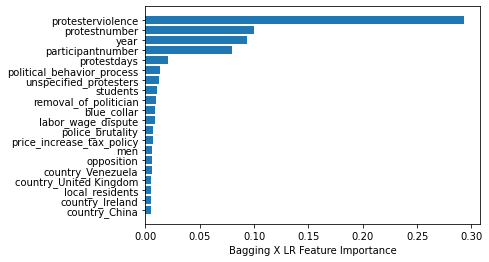

In [54]:
bag_params = {
    'base_estimator' : [None, 1, 2, 3, 4, 5],
    'max_features': [1.0, 2.0, 3.0, 4.0],
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
}

bag_gs = GridSearchCV(BaggingClassifier(LogisticRegression()), bag_params, cv=5)
bag_gs.fit(X_train, y_train)
bag_best = bag_gs.best_estimator_

importance = np.mean([
    tree.feature_importances_ for tree in bag_gs.best_estimator_
], axis=0)

sorted_idx = importance.argsort()[-20:][::1]
plt.barh(features.columns[sorted_idx], importance[sorted_idx])
plt.xlabel("Bagging X LR Feature Importance")
plt.savefig("../project_4b/charts/bagxlr_feature.jpg", bbox_inches = 'tight')

In EDA, **participant number** and **protest days** were found to not be highly correlated with aggressive government responses, however, post-modelling, we see that they are among the top 5 more important features in classifying aggressive responses. 

A protest's **year** being the second most important feature indicates that it is likely an important factor in determining whether a state's response is aggressive or not. Perhaps on hindsight, we should have performed timeseries analysis to check if aggressive responses follow a trend. 

**Protestnumber**, representing the protest the protest number in a country in a year and being an important feature indicates that it becomes more likely a protest is met with an aggressive response when it follows from prior protests in the same country in a given year.

**Protest days** being an important feature indicates that it is likely that the longer a protest runs, the more likely it will face an aggressive response.

**Removal_of_politician** and **political_behaviour_process** are both politics-related protester demands and represent the top 2 most important demand-related features. This indicates that amongst all the protester demands, protests seeking political change contribute most towards the likelihood of an aggressive government response.

## 3.6 Conclusion <a class="anchor" id="3_6"></a>

### Recommendations ###
Pulling back to our goal: we want to accurately predict if a given protest on the planet Earth is likely to face an aggressive state response. From feature importance analysis, it seems that the most important features are (in descending order): (i) protesterviolence, (ii) protestnumber, (iii) year, (iv) participantnumber, and (v) protestdays. In fact, protesterviolence is three times more important than protestnumber in our classification process. This means that protesterviolence is likely imperative as a contributor toward an aggressive government response. We therefore recommend that to maximise the efficiency of our preemptive interventions across the galaxy, given our bandwidth, our observers should immediately flag and escalate to the Jedi Council any protests that see its protesters employing violence.


### Limitations ###
1) In our data collection phase, we should collect more data from different sources in order to supplement our current findings. 

2)The overall highest number of protests, 10,750, belongs to the 'political_behavior_process' which is the broadest category and captures aspects of the political process that determines who rules and how, who can participate in elections or decisions, choices made by leaders that influence a range of political outcomes from domestic subsidies to foreign policy. The general category of demanding “reform” would be captured by political behavior or processes, as would demands for democratic transitions. Given its highly political nature, it's also understandable why it also results in the highest number of aggressive government responses: 1,344. The limitation is that we cannot read too deeply into it due to its very broad spectrum of issues which makes it more general than specifically being about a particular group of issues.

3) From our extensive hyperparameter tuning and model experimentation, we find an unchanging inability of every optimally-tuned model to classify aggressive responses as accurately as non-aggressive responses. We believe that this problem is unresolvable as Earth's history simply has not seen an equal number of aggressive and non-aggressive responses, meaning our dataset has far more of the latter than the former.



### Future Steps ###
With social media having an enormous presence in society. A potential future step would be to scrape from Earth's most popular social media sites such as Instagram, Twitter and reddit. With access to a bigger and more recent set of data, we will be able to gain more insights that will allow us to train our model to be better at predictions. 

Potential future projects that we can look towards include a Machine Learning Protest Database System (PDS). This database will function as an automated system with a goal to replace the labor-intensive process of having human coders look for information about protests in news sources with a computer-aided set of protocols. This will help us to overcome the limitation from our research as our research was limited to a short time period. It can also help to overcome the problem of only having one or two news sources available. These practical limits make it difficult to know how general the results from one study will be for other issues or places or time periods.

Another potential future project can be video analysis using OpenCV. With more and more data being video. For example, Tik Tok and Instagram, being able to touch on these sources will be able to provide a bigger picture of what is happening on the ground. With the OpenCV we will be able to do 3 main things: Object Detection, Object Recognition, Object Tracing.

